# 3-Layer Neural Network from scratch


### Load the relevant libraries

In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Load the data

In [38]:
data_pd=pd.read_csv('/Users/jamie/Personal/Coding/archive/mnist_train.csv')

### Pre-process the data
Transpose to create a 785x60000 matrix, so each column is an example. Then seperate x and y data.

In [40]:
data_np=np.array(data_pd).T
m,n =data_np.shape
y_data = data_np[0]
x_data= data_np[1:n]

### Network Architecture
Below is the architecture for the NN. I define the activation functions, the forward and backwards prop, the function for intialisng the parameteres, the accuracy function, the one-hot encoding of my labels, as well as the function to update parameters.

In [42]:
def relu(Z):
    return np.maximum(0, Z)

def softmax(Z):
    Z_shifted = Z - np.max(Z, axis=0)
    return np.exp(Z_shifted) / np.sum(np.exp(Z_shifted), axis=0)


def forward_propagation(x, w1, b1, w2, b2, w3, b3):
    z1 = np.dot(w1, x) + b1
    a1 = relu(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = relu(z2)
    z3= np.dot(w3, a2) + b3
    a3 = softmax(z3)
    return z1, a1, z2, a2, z3, a3

def initial_params(input_lyr, hid_lyr_1, hid_lyr_2, output_lyr):
    b1 = np.full((hid_lyr_1, 1), 0.01)
    w1 = np.random.randn(hid_lyr_1, input_lyr) * np.sqrt(2. / input_lyr)
    b2 = np.full((hid_lyr_2, 1), 0.01)
    w2 = np.random.randn(hid_lyr_2, hid_lyr_1) * np.sqrt(2. / hid_lyr_1)
    b3 = np.full((output_lyr, 1), 0.01)
    w3 = np.random.randn(output_lyr, hid_lyr_2) * np.sqrt(2. / hid_lyr_1)
    return w1, b1, w2, b2, w3, b3

def one_hot(Y):
    one_hot_y=np.zeros((Y.size, Y.max()+1))
    one_hot_y[np.arange(Y.size), Y]=1
    one_hot_y=one_hot_y.T
    return one_hot_y
    
def derivative_relu(Z):
    return Z > 0
    
def backwards_propagation(y, z1, a1, z2, a2, x, w2, z3, a3, w3):
    one_hot_y= one_hot(y)
    m = y.size
    dz3 = a3 - one_hot_y
    dw3 = 1/m*np.dot(dz3,a2.T)
    db3 = np.sum(dz3, axis=1, keepdims=True)/m
    dz2 = np.dot(w3.T, dz3)*derivative_relu(z2)
    dw2 = 1/m* np.dot(dz2,a1.T)
    db2 = np.sum(dz2, axis=1, keepdims=True) / m
    dz1 = np.dot(w2.T, dz2)*derivative_relu(z1)
    dw1 = 1/m * np.dot(dz1,x.T)
    db1 = np.sum(dz1, axis=1, keepdims=True) / m
    return dw1, db1, dw2, db2, dw3, db3

def update_parameters(w1, b1, w2, b2, w3, b3, dw1, db1, dw2, db2, dw3, db3, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    w3 = w3 - alpha * dw3
    b3 = b3 - alpha * db3
    return w1, b1, w2, b2, w3, b3

def compute_accuracy(y_true, y_pred):
    """
    Computes the accuracy of the predictions.

    Parameters:
    y_true (numpy.ndarray): The true labels (not one-hot encoded).
    y_pred (numpy.ndarray): The predictions, as probabilities (output of softmax).

    Returns:
    float: The accuracy.
    """
    # Get predicted labels from y_pred
    predictions = np.argmax(y_pred, axis=0)
    correct_predictions = predictions == y_true
    accuracy = np.mean(correct_predictions)
    return accuracy

### Gradient Descent
Here is my gradient descent function. I chose to print the training accuracy at set intervbals to observe model performance

In [43]:
def gradient_descent(x, y, iterations, alpha, input_lyr, hid_lyr_1, hid_lyr_2, output_lyr):
    w1, b1, w2, b2, w3, b3 = initial_params(input_lyr, hid_lyr_1, hid_lyr_2, output_lyr) # Ensure this function is defined and returns the initial parameters
    for i in range(iterations):
        z1, a1, z2, a2, z3, a3 = forward_propagation(x, w1, b1, w2, b2, w3, b3)
        dw1, db1, dw2, db2, dw3, db3 = backwards_propagation(y, z1, a1, z2, a2, x, w2, z3, a3, w3)
        w1, b1, w2, b2, w3, b3 = update_parameters(w1, b1, w2, b2, w3, b3, dw1, db1, dw2, db2, dw3, db3, alpha)
        if i % 250 == 0:  # Optionally, print the accuracy every 100 iterations
            accuracy = compute_accuracy(y, a3)
            print(f"Iteration {i}: Accuracy = {accuracy}")


    return w1, b1, w2, b2, w3, b3

### Training Network
Here I define the neurons in my NN, and train the netowrk.

In [45]:
input_lyr= 784
hid_lyr_1 = 256
hid_lyr_2 = 128
output_lyr=10
w1, b1, w2, b2, w3, b3 = gradient_descent(x_data, y_data, 1000, 0.0005, input_lyr, hid_lyr_1, hid_lyr_2, output_lyr)

Iteration 0: Accuracy = 0.10263333333333333
Iteration 250: Accuracy = 0.8702
Iteration 500: Accuracy = 0.89735
Iteration 750: Accuracy = 0.91105


### Testing the Network
Load the test dataset, separate the x and y, and test the model.

In [47]:
test_data_pd=pd.read_csv('/Users/jamie/Personal/Coding/archive/mnist_test.csv')
test_data_np=np.array(test_data_pd).T
t,u = test_data_np.shape
y_test = test_data_np[0]
x_test= test_data_np[1:u]
z_test, a1_test, z2_test, a2_test, z3_test, a3_test = forward_propagation(x_test, w1, b1, w2, b2, w3, b3)
test_accuracy = compute_accuracy(y_test, a3_test)

print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.8959


### Image function
Function to display an observation in image format, with the true label and predicted label. Also functions to determine the set of correct and incorrect predictions, and then select a random susbset of each.

In [48]:
def display_image_with_prediction(index, x_test, y_test, w1, b1, w2, b2, w3, b3):
    """
    Display an image from the test set and the model's prediction.

    Parameters:
    - index: Index of the image in the test dataset.
    - x_test: Test images.
    - y_test: True labels for the test images.
    - w1, b1, w2, b2, w3, b3: Parameters of the trained model.
    """
    # Reshape the image to 28x28 for display
    image = x_test[:, index].reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Do not show axes to keep it clean
    plt.show()
    
    # Predict the label for the selected image
    # Note: x_test[:, index:index+1] is used to keep the dimension
    _, _, _, _, _, a3 = forward_propagation(x_test[:, index:index+1], w1, b1, w2, b2, w3, b3)
    predicted_label = np.argmax(a3, axis=0)
    
    print(f"True Label: {y_test[index]}")
    print(f"Predicted Label: {predicted_label[0]}")
    
def incorrect_predictions_indices(y_test, a3_test):
    predictions = np.argmax(a3_test, axis=0) 
    incorrect_indices = np.where(y_test != predictions)[0]
    return incorrect_indices

def correct_predictions_indices(y_test, a3_test):
    predictions = np.argmax(a3_test, axis = 0)
    correct_indices = np.where(y_test == predictions)[0]
    return correct_indices


def display_multiple_images(random_subset, x_test, y_test, w1, b1, w2, b2, w3, b3):
    for i in random_subset:
        display_image_with_prediction(i, x_test, y_test, w1, b1, w2, b2, w3, b3)


### Images of correct predictions
Print 5 correct predictions

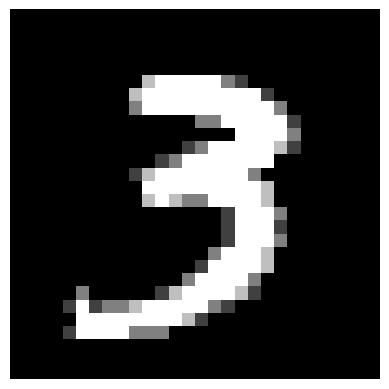

True Label: 3
Predicted Label: 3


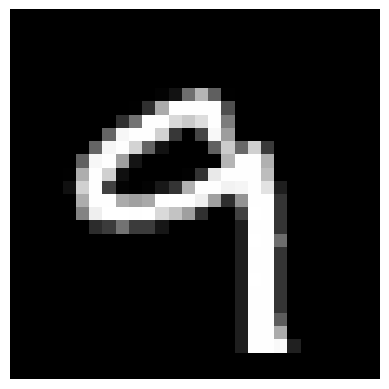

True Label: 9
Predicted Label: 9


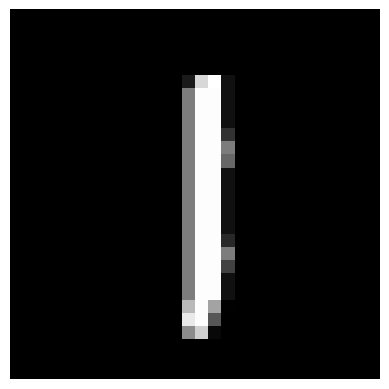

True Label: 1
Predicted Label: 1


In [49]:
correct_indices = correct_predictions_indices(y_test, a3_test)
random_subset_2 = np.random.choice(correct_indices, size=3, replace=False)
display_multiple_images(random_subset_2, x_test, y_test, w1, b1, w2, b2, w3, b3)

### Incorrect Images
Print 5 incorrect predictions

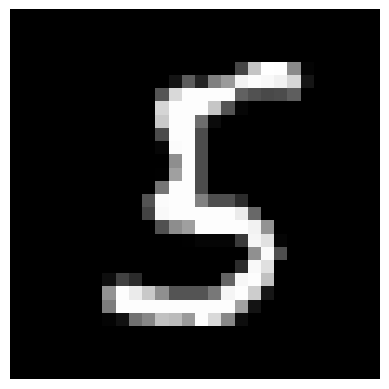

True Label: 5
Predicted Label: 8


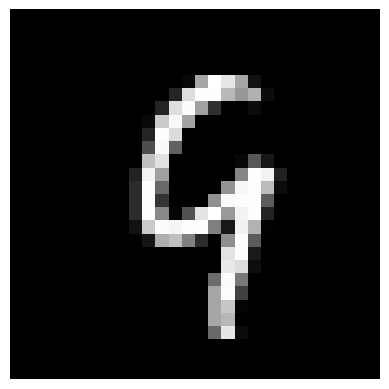

True Label: 9
Predicted Label: 4


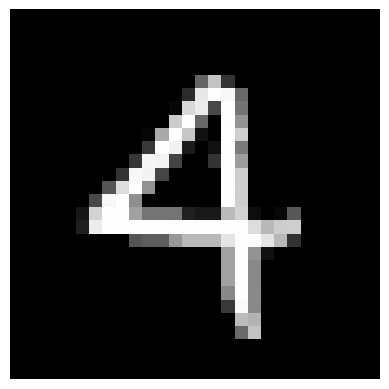

True Label: 4
Predicted Label: 9


In [50]:
incorrect_indices = incorrect_predictions_indices(y_test, a3_test)
random_subset = np.random.choice(incorrect_indices, size=3, replace=False)
display_multiple_images(random_subset, x_test, y_test, w1, b1, w2, b2, w3, b3)